## E-commerce shipping data analysis Part 1
## Exploratory Analysis
- Exploring the data of an international e-commerce company.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df=pd.read_csv('Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [62]:
## Engineering a new
l=[i for i in df['Customer_rating']]

In [63]:
v=list()
for _ in l:
    if _ < 3:
        v.append('Bad')
    elif _ == 3:
        v.append('Normal')
    elif _ == 4:
        v.append('Good')
    else:
        v.append('Great')
        
df['Customer_rate_category']=v

In [65]:
df['Customer_rate_category'].value_counts()

Bad       4400
Normal    2239
Good      2189
Great     2171
Name: Customer_rate_category, dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      10999 non-null  int64 
 1   Warehouse_block         10999 non-null  object
 2   Mode_of_Shipment        10999 non-null  object
 3   Customer_care_calls     10999 non-null  int64 
 4   Customer_rating         10999 non-null  int64 
 5   Cost_of_the_Product     10999 non-null  int64 
 6   Prior_purchases         10999 non-null  int64 
 7   Product_importance      10999 non-null  object
 8   Gender                  10999 non-null  object
 9   Discount_offered        10999 non-null  int64 
 10  Weight_in_gms           10999 non-null  int64 
 11  Reached.on.Time_Y.N     10999 non-null  int64 
 12  Customer_rate_category  10999 non-null  object
dtypes: int64(8), object(5)
memory usage: 1.1+ MB


In [67]:
df['Customer_rate_category'].value_counts()

Bad       4400
Normal    2239
Good      2189
Great     2171
Name: Customer_rate_category, dtype: int64

## Univariate Exploration

## From which warehouse do the shipments come from ?

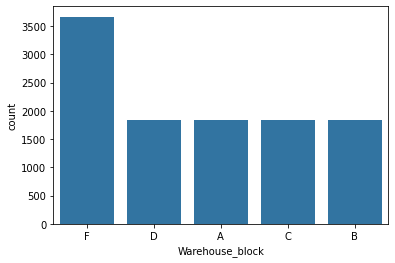

In [68]:
base_color=sns.color_palette()[0]
ware_order=df['Warehouse_block'].value_counts().index
sns.countplot(data=df,x='Warehouse_block',color=base_color,order=ware_order);

In [69]:
df['Warehouse_block'].value_counts(normalize=True)

F    0.333303
D    0.166742
A    0.166652
C    0.166652
B    0.166652
Name: Warehouse_block, dtype: float64

### 33.3% of the products come from warehouse f, and 16.6% of the products from each one of the rest warehouses

## What is the most common shipping method ?

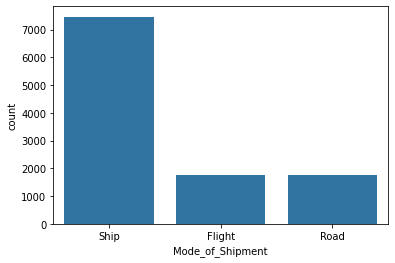

In [70]:
ship_order=df['Mode_of_Shipment'].value_counts().index
sns.countplot(data=df,x='Mode_of_Shipment',color=base_color,order=ship_order);

In [71]:
df['Mode_of_Shipment'].value_counts(normalize=True)

Ship      0.678425
Flight    0.161560
Road      0.160015
Name: Mode_of_Shipment, dtype: float64

### The majority of the products are shipped using ship.

## How many calls are made from enquiry for enquiry of the shipment ?

<AxesSubplot:xlabel='Customer_care_calls', ylabel='count'>

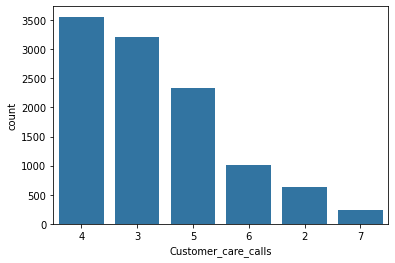

In [72]:
order=df['Customer_care_calls'].value_counts().index
sns.countplot(data=df,x='Customer_care_calls',color=base_color,order=order)

In [73]:
df['Customer_care_calls'].value_counts(normalize=True)

4    0.323393
3    0.292481
5    0.211656
6    0.092099
2    0.058005
7    0.022366
Name: Customer_care_calls, dtype: float64

<AxesSubplot:xlabel='Customer_care_calls'>

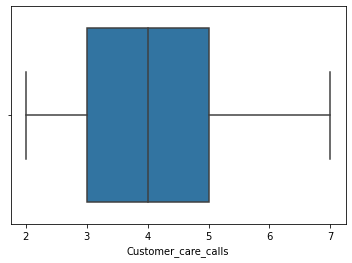

In [74]:
sns.boxplot(data=df,x='Customer_care_calls')

### The most common number of calls made from enquiry for enquiry of the shipment is 4 calls, 3 calls is also a frequent number, and numbers like 2 calls or 7 calls are rare, so on average we can expect to make from 3 to 5 calls during the shipment process

## How do customers rate the company ?

In [75]:
df.head(2)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Customer_rate_category
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,Bad
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,Great


<AxesSubplot:xlabel='Customer_rate_category', ylabel='count'>

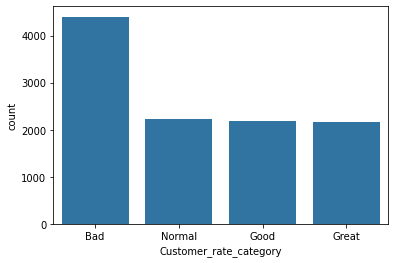

In [76]:
g=df['Customer_rate_category'].value_counts().index
sns.countplot(data=df,x='Customer_rate_category',color=base_color,order=g)

In [77]:
df['Customer_rate_category'].value_counts(normalize=True)

Bad       0.400036
Normal    0.203564
Good      0.199018
Great     0.197382
Name: Customer_rate_category, dtype: float64

## 40% of the customers rated the company as bad, and almost 40% good and 20% normal

## What is the distribution of the prices of products ?

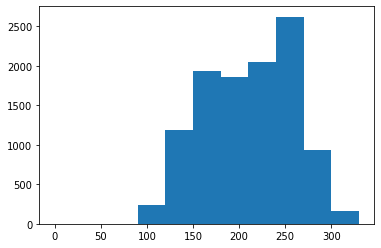

In [85]:
bins=np.arange(0,df['Cost_of_the_Product'].max()+30,30)
plt.hist(df['Cost_of_the_Product'],bins=bins);

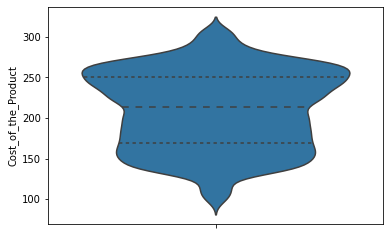

In [79]:
sns.violinplot(data=df,y='Cost_of_the_Product',inner='quartile');

In [80]:
display(df['Cost_of_the_Product'].min())
display(df['Cost_of_the_Product'].median())
df['Cost_of_the_Product'].max()

96

214.0

310

### The most frequent cost of product is about 250 usd , the max is 310 usd and the min is 96 usd.

---

## what is the number of males and females in a our customers ?

<AxesSubplot:xlabel='Gender', ylabel='count'>

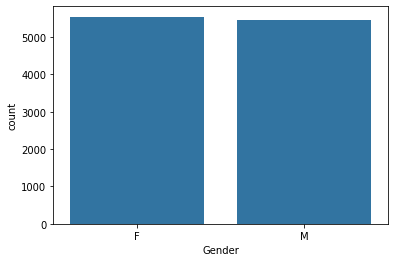

In [86]:
sns.countplot(data=df,x='Gender',color=base_color)

In [87]:
df['Gender'].value_counts()

F    5545
M    5454
Name: Gender, dtype: int64

### There is no significant difference between number of female and male customers

-------

## What is the proportion of shipings that were reached on time ?

[Text(0, 0.5, 'Percent')]

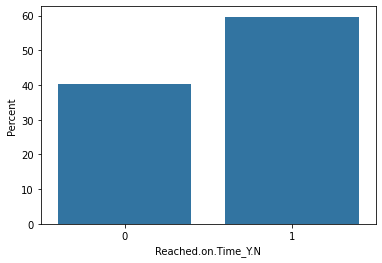

In [89]:
#sns.countplot(data=df,x='Reached.on.Time_Y.N')
ax = sns.barplot(x="Reached.on.Time_Y.N", y='Reached.on.Time_Y.N', data=df, estimator=lambda x: len(x) / len(df) * 100,color=base_color)
ax.set(ylabel="Percent")

- 60% of the shippments were delivered on time.

## Bivariate Exploration

In [90]:
df.head(2)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Customer_rate_category
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,Bad
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,Great


In [107]:
p_list=[ _ for _ in df['Prior_purchases'] ]

In [108]:
purchase_list=[]
for i in p_list:
    if i <=3:
        purchase_list.append('3 or less')
    elif i>3 and i<7:
        purchase_list.append('from 4 to 6')
    else:
        purchase_list.append('more than 6')
        
df['prior_purchase_status']=purchase_list

## What is the relationship between customer rate and number of prior purchases ?

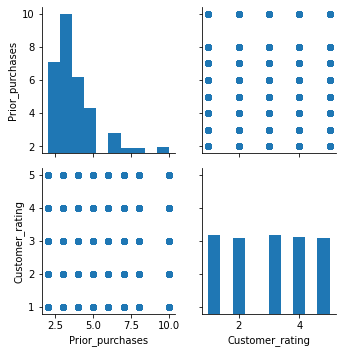

In [96]:
g=sns.PairGrid(df,vars=['Prior_purchases','Customer_rating'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

<AxesSubplot:xlabel='Customer_rate_category', ylabel='prior_purchase_status'>

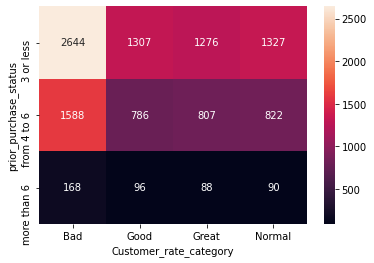

In [110]:
#sns.lmplot(data=df,x='Prior_purchases',y='Customer_rating')
ct_counts=df.groupby(['prior_purchase_status','Customer_rate_category']).size()
ct_counts=ct_counts.reset_index(name='count')
ct_counts=ct_counts.pivot(index='prior_purchase_status',columns='Customer_rate_category',values='count')
sns.heatmap(ct_counts,annot=True,fmt='d')

### the more purchases the customer make the less chance of him rating the company as bad

## What is the relationship between product quality and being delieverd on time ?

In [ ]:
data = np.random.rand(12, 12)
ax = sns.heatmap(data, cmap="Greens")

<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='Product_importance'>

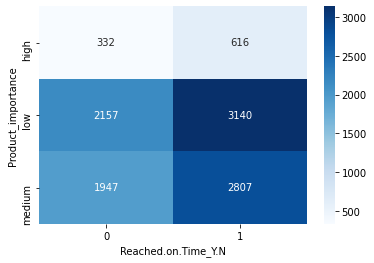

In [112]:
ct_counts=df.groupby(['Product_importance','Reached.on.Time_Y.N']).size()
ct_counts=ct_counts.reset_index(name='count')
ct_counts=ct_counts.pivot(index='Product_importance',columns='Reached.on.Time_Y.N',values='count')
sns.heatmap(ct_counts,annot=True,fmt='d',cmap='Blues')

### Products with low importance have higher chance of being delievered on time.

----

## What is the average cost of product purchased by each gender ?

<AxesSubplot:xlabel='Gender', ylabel='Cost_of_the_Product'>

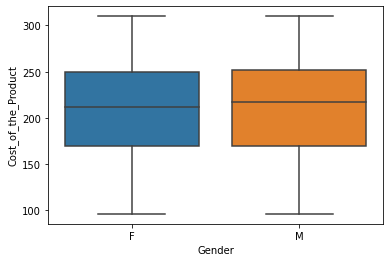

In [116]:
sns.boxplot(data=df,x='Gender',y='Cost_of_the_Product')

In [115]:
df.groupby('Gender')['Cost_of_the_Product'].median()

Gender
F    212
M    217
Name: Cost_of_the_Product, dtype: int64

### There is no difference between the average cost of product bought buy each gender.

---

## What is the relationship between mode of shipment and shiping the products on time ?

<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='Mode_of_Shipment'>

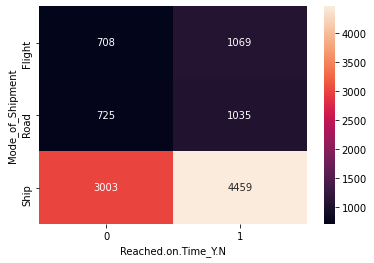

In [120]:
ct_counts=df.groupby(['Mode_of_Shipment','Reached.on.Time_Y.N']).size()
ct_counts=ct_counts.reset_index(name='count')
ct_counts=ct_counts.pivot(index='Mode_of_Shipment',columns='Reached.on.Time_Y.N',values='count')
sns.heatmap(ct_counts,annot=True,fmt='d',cmap='rocket')

### 60% of shipments delievered by flight were delievered on time
### 59.75% of shipments delievered by ship were delievered on time
### 58.8% of shipments delievered by road were delievered on time

<AxesSubplot:>

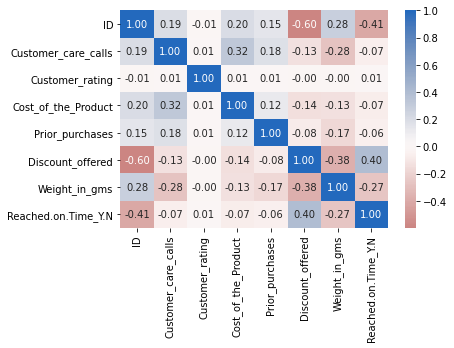

In [105]:
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='vlag_r',center=0)

---

## Multivariate Exploration

In [130]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Customer_rate_category,prior_purchase_status
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,Bad,3 or less
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,Great,3 or less
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,Bad,from 4 to 6
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,Normal,from 4 to 6
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,Bad,3 or less


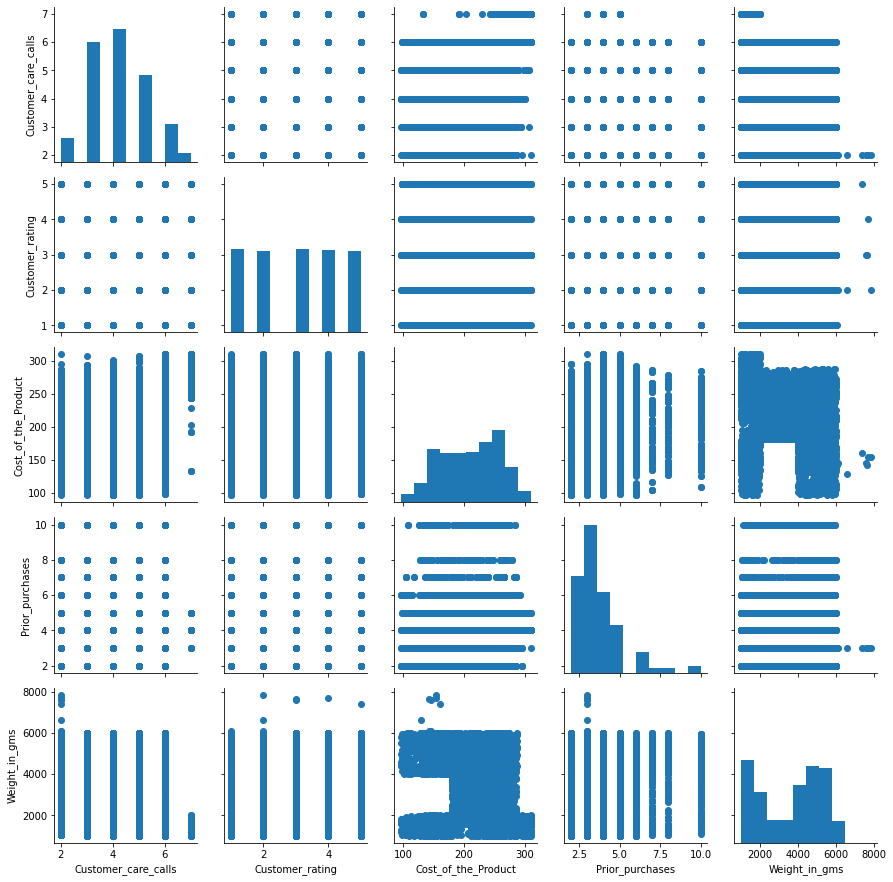

In [122]:
g=sns.PairGrid(data=df,vars=['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Weight_in_gms'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

C:\Users\Sayed\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


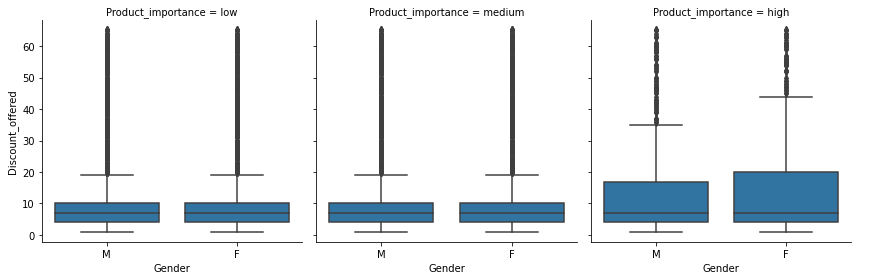

In [133]:
g=sns.FacetGrid(data=df,col='Product_importance',height=4)
g=g.map(sns.boxplot,'Gender','Discount_offered')
g.add_legend()


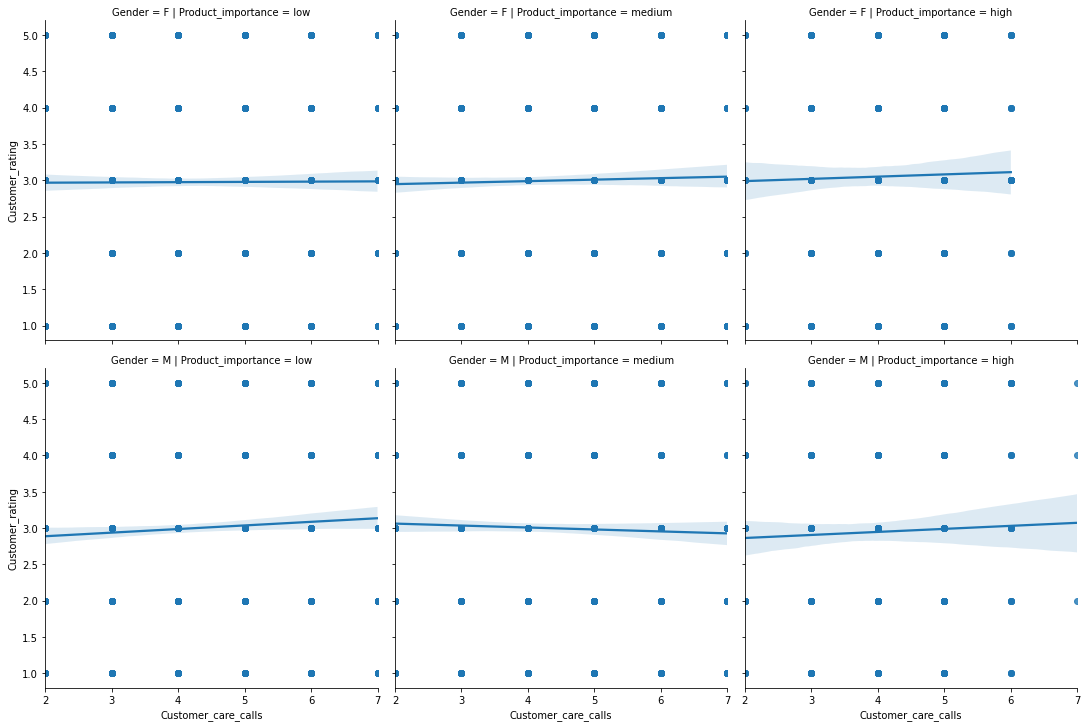

In [138]:

sns.lmplot(data=df,x='Customer_care_calls',y='Customer_rating',col='Product_importance',row='Gender')

---